In [91]:
import requests
import json
import pandas as pd
from config import nyt_key
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
months = ["3","4","5","6","7"]
year = "2016"

publication_date = []
document_type = []
headline = []
abstract = []
snippet = []
lead_paragraph = []
keyword_1 = []
keyword_2 = []
keyword_3 = []

for month in months:
    base_url = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={nyt_key}"
    response = requests.get(base_url).json()["response"]["docs"]
    for i in response:
        if len(i["keywords"]) >= 3:
            publication_date.append(i["pub_date"])
            document_type.append(i["document_type"])
            headline.append(i["headline"]["main"])
            abstract.append(i["abstract"])
            snippet.append(i["snippet"])
            lead_paragraph.append(i["lead_paragraph"])
            keyword_1.append(i["keywords"][0]["value"])
            keyword_2.append(i["keywords"][1]["value"])
            keyword_3.append(i["keywords"][2]["value"])

In [93]:
data = {
    "publication_date":publication_date,
    "document_type":document_type,
    "headline":headline,
    "abstract":abstract,
    "snippet":snippet,
    "lead_paragraph":lead_paragraph,
    "keyword_1":keyword_1,
    "keyword_2":keyword_2,
    "keyword_3":keyword_3,
}

In [94]:
df = pd.DataFrame(data)
print(len(df))
df.head()

36599


,publication_date,document_type,headline,abstract,snippet,lead_paragraph,keyword_1,keyword_2,keyword_3
0,2016-03-02T14:38:17+0000,article,Debate Over Privacy Finds Little Agreement,As lawmakers questioned representatives from A...,As lawmakers questioned representatives from A...,If you’re looking for a sign of how widespread...,Privacy,Computer Security,Apple Inc
1,2016-03-01T03:55:15+0000,article,"Alice Arlen, Screenwriter and Collaborator Wit...",Ms. Arlen and Ms. Ephron were Oscar nominees f...,Ms. Arlen and Ms. Ephron were Oscar nominees f...,"Alice Arlen, a screenwriter who collaborated w...","McFadden, Robert D",Deaths (Obituaries),Silkwood (Movie)
2,2016-03-03T12:00:05+0000,article,Greenpoint’s Culinary Ghosts,"Learning to make bigos, a meat-and-sauerkraut ...","Learning to make bigos, a meat-and-sauerkraut ...","When I moved to Brooklyn in 1999, I’d never he...",Cooking and Cookbooks,Sausages,"Greenpoint (Brooklyn, NY)"
3,2016-03-01T00:07:47+0000,article,Review: Christine Andreas’s Nostalgic Turn in ...,Ms. Andreas looks back at tales of fabled club...,Ms. Andreas looks back at tales of fabled club...,The past usually looks prettier than the prese...,"Holden, Stephen",Music,"ANDREAS, CHRISTINE"
4,2016-03-03T18:12:01+0000,article,Ambac Financial Gets Pressed to Make a Move,"Buying up claims can help the company, but doi...","Buying up claims can help the company, but doi...",The Ambac Financial Group is getting the right...,Stocks and Bonds,Conflicts of Interest,Ambac Financial Group Inc


In [95]:
# getting total counts of keywords from entire data set including all months
keyword_count_1 = df.keyword_1.value_counts()[0:500]
keyword_count_2 = df.keyword_2.value_counts()[0:500]
keyword_count_3 = df.keyword_3.value_counts()[0:500]

# combine total keyword counts into new dataframe and display top 50 results
combined = pd.concat([keyword_count_1,keyword_count_2,keyword_count_3],axis=1).fillna(0)
combined = combined["keyword_1"] + combined["keyword_2"] + combined["keyword_3"]
top_keywords = combined.sort_values(ascending=False)[0:20]

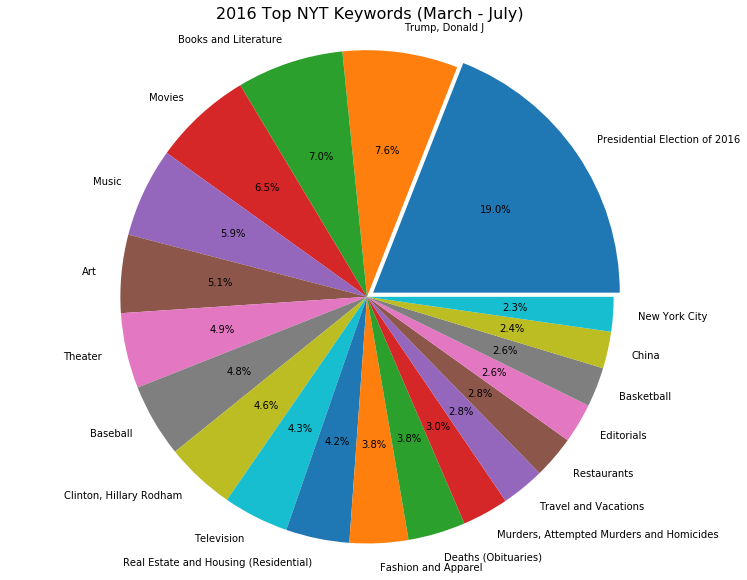

In [96]:
plt.figure(figsize=(13,10))
explode = (.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
plt.pie(top_keywords,explode=explode,labels=top_keywords.index,autopct="%1.1f%%")
plt.axis("equal")
plt.title(f"{year} Top NYT Keywords (March - July)",size=16)
plt.savefig(f"Output/{year} Top NYT Keywords (March - July).png")